# Examen parcial 3 (calculo numerico y algebra lineal)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.10am del 30.03.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Ejercicio 1

El archivo $\textbf{data_radius_density.csv}$ contiene dos columnas: radio ($ r $) y la densidad ($ \rho (r) $) de un disco plano en función del radio

El disco es lo suficientemente delgado como para que, con fines matemáticos, podamos tratarlo como un objeto bidimensional. Asumimos que la densidad se da en términos de masa por unidad de área (llamada densidad de área), y además asumimos que la densidad varía solo a lo largo del radio del disco (llamada densidad radial). Orientamos el disco en el plano xy, con el centro en el origen. Entonces, la densidad del disco puede ser tratada como una función de x, denotada $\rho(x)$.
<table><tr>
<td> <img src="disk_radius_density.png" width="500" /> </td>
</tr></table>   

* a) importar los datos usando Pandas, graficar la densidad del disco frente a su radio (los gráficos deben tener etiquetas para el eje `x` y el eje `y`).

* b) sabiendo que la masa del disco viene dada por una integral:
$$ m = \int_0^{r} 2 \pi \ r * \rho (r) \ dr $$
     calcular la masa del disco mediante integración numérica

* Pista:`x`: is radius and `y`: is ***integrand***


In [136]:
# a) Montamos la base de datos
from __future__ import print_function
from google.colab import drive 
drive.mount('/content/gdrive')
 
!cp '/content/gdrive/My Drive/Colab Notebooks/data_radius_density.csv' 'data_radius_density.csv'

!cp '/content/gdrive/My Drive/Colab Notebooks/data_pressure_vs_temparature.csv' 'data_pressure_vs_temparature.csv'
import pandas as pd
df = pd.read_csv('data_radius_density.csv') 


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [137]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data_radius_density.csv') 
df.head()



,radius,density
0,0.000000,0.000000
1,0.040404,0.201008
2,0.080808,0.284268
3,0.121212,0.348155
4,0.161616,0.402015


No handles with labels found to put in legend.


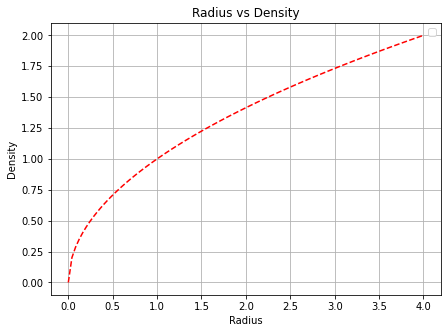

In [138]:
#Graficamos P vs t
import numpy as np
import matplotlib.pyplot as plt
x=df['radius'].to_numpy()
y=df['density'].to_numpy()
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(x,y,'--r')

ax.legend()
ax.set_title('Radius vs Density')
ax.set_xlabel('Radius')
ax.set_ylabel('Density')
ax.grid(True)

In [139]:
#b) Calculamos la masa
from scipy import integrate
v=2*np.pi*x
integrand=v*y
I=I_simps=integrate.simps(integrand,x) 
print("La masa del disco seria de ",I)


La masa del disco seria de  80.42489768943994


# Ejercicio 2

La capacidad calorífica de un gas muy frío se puede aproximar mediante:

$$ C_v \approx \left (\frac{dP}{dT} \right) $$
(en las unidades de $ \left [\frac {J} {K} \right] $)

Donde $P$ es la presión $ [J / s^3] $ del gas y $ T \ [K] $ es la temperatura del gas.

Los datos para la presión frente a la temperatura se dan en el archivo csv ($ \textbf{data_pressure_vs_temperature.csv} $).

* a) importar los datos usando pandas
* b) hacer un gráfico de $P$ vs $T$ (grafico tiene que tener etiquietas)
* c) utilizando la derivada numérica, encuentre la capacidad calorífica.
* d) hacer un gráfico de $C_v$ vs $T$ (grafico tiene que tener etiquietas)
* e) usando el ultimo grafico hace una estimacion de Temperatura Critica de este gas (Temperatura Critica es Temperatura de cambio abrupto del comportamiento de Capacidad Termica)
* f) hace interpolacion cubica (100 puntos) de los valores de pression $P$, repite puntos `c)` y `d)`

*gas muy frío se refiere a un gas Bose no homogéneo, y la teoría que relaciona $ C_v $ y $ P $ se refiere a la Teoría de Variables Globales Termodinámicas. La presión en realidad se llama parámetro de presión.

In [140]:
#a) montamos base de datos
import pandas as pd
df = pd.read_csv('data_pressure_vs_temparature.csv') 
df.head()

,Temperature,Pressure
0,4.789201e-08,1.958251e-17
1,6.625061e-08,2.055515e-17
2,8.460922e-08,2.237848e-17
3,1.029678e-07,2.534132e-17
4,1.213264e-07,2.994527e-17


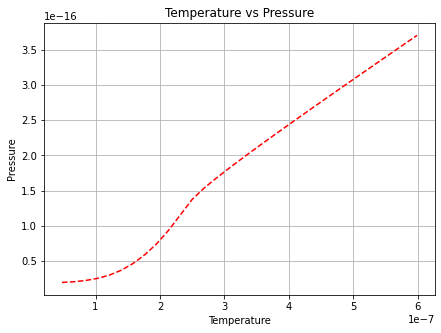

In [141]:
#Graficamos la funcion P vs T
import numpy as np
import matplotlib.pyplot as plt
x1=df['Temperature'].to_numpy()
y1=df['Pressure'].to_numpy()
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(x1,y1,'--r')
ax.set_title('Temperature vs Pressure')
ax.set_xlabel('Temperature')
ax.set_ylabel('Pressure')
ax.grid(True)

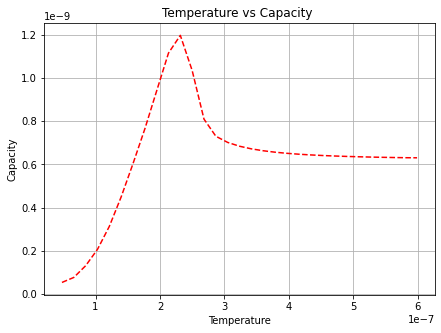

In [142]:
#C y d)Encontamos la derivada numerica y graficamos
from scipy import gradient
c = np.gradient(y1, x1)
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(x1,c,'--r')
ax.set_title('Temperature vs Capacity ')
ax.set_xlabel('Temperature')
ax.set_ylabel('Capacity')
ax.grid(True)


In [143]:
# e) La temperatrua llega a un pico y cambia aproximadamente en 2.4 * 10 **-7, esta seria la temperatura critica

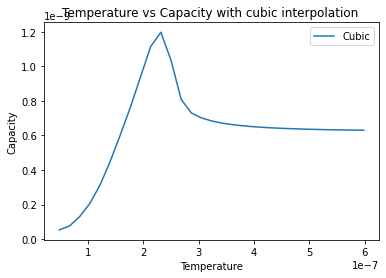

In [144]:
#f) interpolamos y repetimos c y d con la interpolacion hallada
from scipy.interpolate import interp1d
p1 = interp1d(x1, y1, kind='cubic')
c1=np.gradient(p1(x1), x1)
fig, ax = plt.subplots(1,1)
ax.plot(x1, c1, label='Cubic')
ax.set_title('Temperature vs Capacity with cubic interpolation ')
ax.set_xlabel('Temperature')
ax.set_ylabel('Capacity')
ax.legend()
plt.show()

# Ejercicio 3

Dada es Matrix $S$:

$$S=
\begin{bmatrix}
1 &  -1 & -1 & -1\\
-1 &  2 & 0 & 0\\
-1 &  3 & 3 & 0 \\
-1 &  0 & 1 & 4 \\
\end{bmatrix}$$


a) calcular $S^5$ utilizando diagonalización.  

b) crear una funcion `matrix_power(A,n)` que recive dos parametros: matrix $A$, y valor entero de la potencia $n$. Funcion tiene que devolver una matrix $M=A^n$ (usa diagonalizacion)

In [145]:
#a)Calculammos la potenica de la matriz
import numpy as np 
A=np.array([[1,-1,-1,-1],
            [-1,2,0,0],
            [-1,3,3,0],
           [-1,0,1,4]])

evalues, evectors = np.linalg.eig(A)
d=np.diag(evalues)
P = evectors
Pinv=np.linalg.inv(P)
D=d**5
potencia=np.matmul(P,np.matmul(D,Pinv))
Apow=np.linalg.matrix_power(A, 5)
print("La potencia calculada con diagonalizacion\n",potencia)
print('\n')
print("La potencia calculada con numpy\n",Apow)

La potencia calculada con diagonalizacion
 [[  485.  -755.  -563.  -563.]
 [ -179.   280.   192.   192.]
 [ -675.  1201.   707.   464.]
 [-1027.  1448.  1275.  1518.]]


La potencia calculada con numpy
 [[  485  -755  -563  -563]
 [ -179   280   192   192]
 [ -675  1201   707   464]
 [-1027  1448  1275  1518]]


In [146]:
#b)Definimos una funcion para calcular potencias de matrices
def My_matrix_power(A,n):
  evalues, evectors = np.linalg.eig(A)
  d=np.diag(evalues)
  P = evectors
  Pinv=np.linalg.inv(P)
  D=d**n
  potencia=np.matmul(P,np.matmul(D,Pinv))
  return potencia
A=np.array([[1,-1,-1,-1],
            [-1,2,0,0],
            [-1,3,3,0],
           [-1,0,1,4]])  
print("Matriz elevada a la 6 usando mi funcion\n",My_matrix_power(A,6))

print("Matriz elevada a la 6 usando numpy\n", np.linalg.matrix_power(A, 6))

Matriz elevada a la 6 usando mi funcion
 [[ 2366. -3684. -2737. -2737.]
 [ -843.  1315.   947.   947.]
 [-3047.  5198.  3260.  2531.]
 [-5268.  7748.  6370.  7099.]]
Matriz elevada a la 6 usando numpy
 [[ 2366 -3684 -2737 -2737]
 [ -843  1315   947   947]
 [-3047  5198  3260  2531]
 [-5268  7748  6370  7099]]


# Feedback:
```
Exercise 1.
Importation of the data + labeled plot (rho vs. r)	            (max 0.5p):	0.5p
Calculation of the integral                 		              (max 1.5p):	1.5p

Exercise 2.
Importation of the data + labeled plot P vs. T 	               (max 0.5p):	0.5p
Calculation of the derivative and plot Cv vs. T        		   (max 2.0p):	2.0p
Approximation of the critical temperature                         (max 0.5p):	0.5p
Interpolation                                                     (max 1.0p):	1.0p

Exercise 3.
Calculation of the M^n                                 	       (max 2.0p):	2.0p
Function of the M^n                                    	       (max 2.0p):	2.0p

- Total:                                                          (max 10.0p):   10.0p
```